In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from tqdm import tqdm
import pandas as pd
from scipy.stats import linregress
from scipy.integrate import simps
from scipy import signal

In [64]:
files = glob.glob('data/*.txt')
sf = 600
mydic = {}
mydic['Amp'] = []
mydic['RP_alpha'] = []
mydic['RP_theta'] = []
mydic['RP_delta'] = []
# mydic['RP_beta'] = []
mydic['DAR'] = []
# mydic['DTABR'] = []
for eeg in tqdm(files):
    data = np.loadtxt(eeg)
    time = np.arange(data.size) / sf
    win = 4*sf
    freqs, psd = signal.welch(data, sf, nperseg=win)
    idx_delta = np.logical_and(freqs >= 1, freqs <= 4)
    idx_theta = np.logical_and(freqs >= 4, freqs <= 8)
    idx_alpha = np.logical_and(freqs >= 8, freqs <= 12)
    idx_beta  = np.logical_and(freqs >= 12,freqs <= 30)
    idx_total = np.logical_and(freqs >= 1, freqs <= 30)
    total_power = simps(psd[idx_total], dx=freqs[1] - freqs[0])
    delta_power = simps(psd[idx_delta], dx=freqs[1] - freqs[0])
    theta_power = simps(psd[idx_theta], dx=freqs[1] - freqs[0])
    alpha_power = simps(psd[idx_alpha], dx=freqs[1] - freqs[0])
    beta_power = simps(psd[idx_beta], dx=freqs[1] - freqs[0])
    delta_rel_power = delta_power / total_power
    theta_rel_power = theta_power / total_power
    alpha_rel_power = alpha_power / total_power
    beta_rel_power = beta_power / total_power
    dar = delta_power / alpha_power
    dtabr = (delta_power+theta_power)/(alpha_power+beta_power)
    mydic['Amp'].append(np.max(data))
    mydic['RP_delta'].append(delta_rel_power)
    mydic['RP_theta'].append(theta_rel_power)
    mydic['RP_alpha'].append(alpha_rel_power)
#     mydic['RP_beta'].append(beta_rel_power)
    mydic['DAR'].append(dar)
#     mydic['DTABR'].append(dtabr)

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:06<00:00,  4.58it/s]


In [65]:
df = pd.DataFrame(mydic)

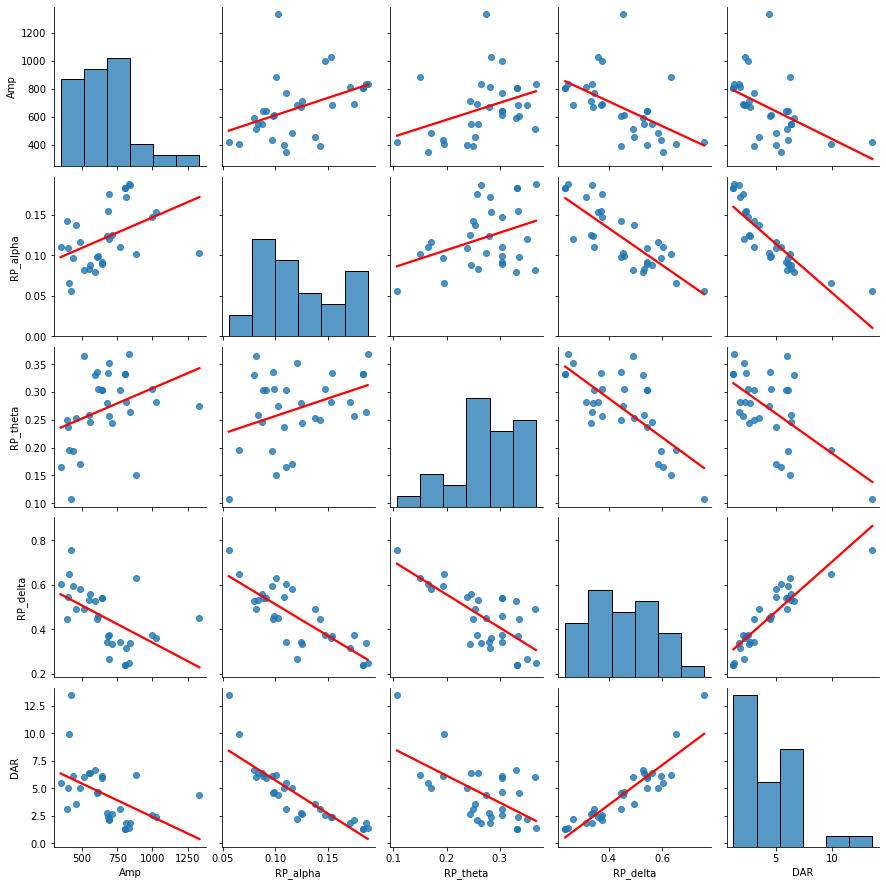

In [66]:
grd = sns.pairplot(df, kind='reg', plot_kws={'ci':0, 'line_kws':{'color':'r'}})